In [ ]:
!pip install ipykernel pandas kagglehub openpyxl seaborn

# Dataset Download

In [2]:
import kagglehub
import os
import shutil

# Download latest version

# Download dataset and get the cache path
cache_path =  kagglehub.dataset_download("ikramshah512/amazon-products-sales-dataset-42k-items-2025")

# Get current working directory 
notebook_dir = os.getcwd()

# Define destination folder
dest_path = os.path.join(notebook_dir, "dataset")

# Copy dataset into your notebook folder

shutil.copytree(cache_path, dest_path)

print("Success. Dataset downloaded to:", dest_path)

f:\GitHub\CSC0413_CS-Elective-II_Activity-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'f:\\GitHub\\CSC0413_CS-Elective-II_Activity-1\\dataset'

# Dataset Cleaning

In [3]:
import pandas as pd
df = pd.read_csv(os.path.join(dest_path, "amazon_products_sales_data_uncleaned.csv"))

### Check for missing values

In [5]:
df.isnull().sum()

title                           0
rating                       1024
number_of_reviews            1024
bought_in_last_month         3217
current/discounted_price    11749
price_on_variant                0
listed_price                    0
is_best_seller                  0
is_sponsored                    0
is_couponed                     0
buy_box_availability        14653
delivery_details            11720
sustainability_badges       39267
image_url                       0
product_url                  2069
collected_at                    0
dtype: int64

### Since there is null values on certain cells we need to remove that row

In [6]:
filtereDF = df.dropna()
filtereDF.isnull().sum()

title                       0
rating                      0
number_of_reviews           0
bought_in_last_month        0
current/discounted_price    0
price_on_variant            0
listed_price                0
is_best_seller              0
is_sponsored                0
is_couponed                 0
buy_box_availability        0
delivery_details            0
sustainability_badges       0
image_url                   0
product_url                 0
collected_at                0
dtype: int64

### Check for Datatype

In [7]:
filtereDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 42664
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2175 non-null   object
 1   rating                    2175 non-null   object
 2   number_of_reviews         2175 non-null   object
 3   bought_in_last_month      2175 non-null   object
 4   current/discounted_price  2175 non-null   object
 5   price_on_variant          2175 non-null   object
 6   listed_price              2175 non-null   object
 7   is_best_seller            2175 non-null   object
 8   is_sponsored              2175 non-null   object
 9   is_couponed               2175 non-null   object
 10  buy_box_availability      2175 non-null   object
 11  delivery_details          2175 non-null   object
 12  sustainability_badges     2175 non-null   object
 13  image_url                 2175 non-null   object
 14  product_url               21

### Assign proper Datatype

In [ ]:
#Convert ratings to float (handle NaNs)
filtereDF['rating'] = filtereDF['rating'].astype(str)
filtereDF['rating'] = pd.to_numeric(filtereDF['rating'].str.extract(r'([\d.]+)')[0], errors='coerce')

# Convert number of reviews to int (handle NaNs)
filtereDF['number_of_reviews'] = filtereDF['number_of_reviews'].astype(str)
filtereDF['number_of_reviews'] = pd.to_numeric(filtereDF['number_of_reviews'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Convert bought_in_last_month to int (handle NaNs)
filtereDF['bought_in_last_month'] = filtereDF['bought_in_last_month'].astype(str)
filtereDF['bought_in_last_month'] = pd.to_numeric(
    filtereDF['bought_in_last_month'].str.extract(r'(\d+)')[0],
    errors='coerce'
)
filtereDF['bought_in_last_month'] = filtereDF['bought_in_last_month'].fillna(0).astype(int)

# Convert current/discounted_price to float (handle NaNs)
filtereDF['current/discounted_price'] = filtereDF['current/discounted_price'].astype(str)
filtereDF['current/discounted_price'] = pd.to_numeric(
    filtereDF['current/discounted_price'].str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'
)
#Convert listed_price to float (handle NaNs)
filtereDF['listed_price'] = filtereDF['listed_price'].astype(str)
filtereDF['listed_price'] = pd.to_numeric(
    filtereDF['listed_price'].str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'
)

# Convert is_best_seller and is_sponsored to boolean
filtereDF['is_best_seller'] = filtereDF['is_best_seller'].map({'Yes Badge': True, 'No Badge': False})
filtereDF['is_sponsored'] = filtereDF['is_sponsored'].map({'Sponsored': True, '': False})

filtereDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 42664
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     2175 non-null   object 
 1   rating                    2175 non-null   float64
 2   number_of_reviews         2175 non-null   int64  
 3   bought_in_last_month      2175 non-null   int64  
 4   current/discounted_price  2175 non-null   float64
 5   price_on_variant          2175 non-null   object 
 6   listed_price              958 non-null    float64
 7   is_best_seller            2079 non-null   object 
 8   is_sponsored              707 non-null    object 
 9   is_couponed               2175 non-null   object 
 10  buy_box_availability      2175 non-null   object 
 11  delivery_details          2175 non-null   object 
 12  sustainability_badges     2175 non-null   object 
 13  image_url                 2175 non-null   object 
 14  product_url 

C:\Users\user\AppData\Local\Temp\ipykernel_14196\3554142806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereDF['rating'] = filtereDF['rating'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_14196\3554142806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereDF['rating'] = pd.to_numeric(filtereDF['rating'].str.extract(r'([\d.]+)')[0], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_14196\3554142806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

### Check for duplicate

In [9]:
filtereDF.duplicated().sum()

np.int64(0)

### Check for Spelling and Typographical Errors

In [10]:
filtereDF['title'].unique()

array(['BOYA BOYALINK 2 Wireless Lavalier Microphone for iPhone Camera Android, Mini Lapel Micophone Wireless, 48 KHz 24 Bit, 6mm Mic, 1000ft, 30h Use, Noise Cancelling, Clip on Mic USB-C/Lightning/3.5mm TRS',
       'Amazon Basics 48-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life',
       'Peak Design Slide Lite Camera Strap, Black, Configurable as a Sling, Neck or Shoulder Strap, Quick Release and Connection, Smooth and Grippy Side, Camera Straps for Photographers, 200 lb Capacity',
       'Amazon Basics Multipurpose Copy Printer Paper, 20 lb, 8.5 x 11 Inches, 8 Reams (4,000 Sheets), 92 Bright, White',
       'Amazon Basics AAA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life, 36 Count (Pack of 1)',
       'Logitech Brio 101 Full HD 1080p Webcam for Meetings, Streaming, Desktop, Laptop, PC - Built-in Mic, Shutter, USB-A, Teams, Zoom - Black',
       'Anker iPhone 16 Charger, 2-Pack 20W Fast USB C Charger Block, for iPhone 16/16 Pro Max/15 S

### Detecting outlier

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = filtereDF.columns.str.strip()
numeric_cols = filtereDF.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)
outliers_dict = {}

for col in numeric_cols:
    Q1 = filtereDF[col].quantile(0.25)
    Q3 = filtereDF[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = filtereDF[(filtereDF[col] < lower) | (filtereDF[col] > upper)]
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]
        print(f"\nPossible Outliers in {col}:")
        print(outliers[[col]])

Numeric columns: ['rating', 'number_of_reviews', 'bought_in_last_month', 'current/discounted_price', 'listed_price']

Possible Outliers in rating:
       rating
225       3.6
421       3.8
462       3.7
570       3.8
596       3.8
...       ...
41389     3.7
41542     3.7
41770     3.7
41803     3.7
42198     3.7

[102 rows x 1 columns]

Possible Outliers in number_of_reviews:
       number_of_reviews
10                865598
16                198512
17                625776
66                 24693
71                 19724
...                  ...
38842             137593
38869             137593
39037              33388
39464             137593
42043             137630

[123 rows x 1 columns]

Possible Outliers in bought_in_last_month:
      bought_in_last_month
895                    900
1703                   800
2055                   800
2367                   800
2613                   800
4158                   900
4921                   800
5806                   800
7276     

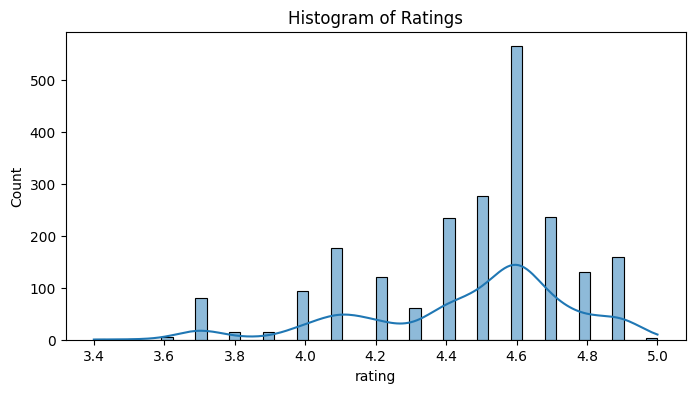

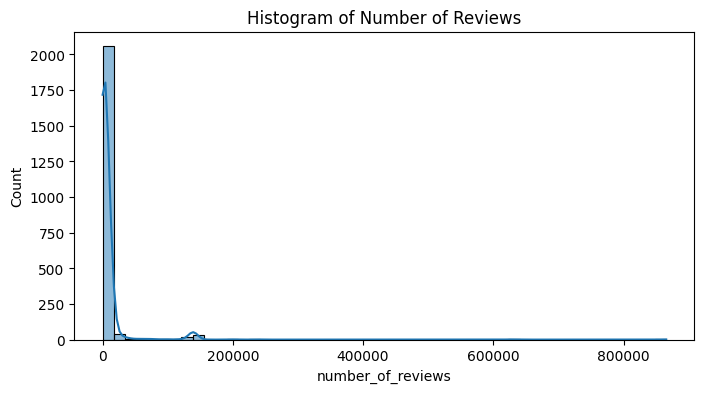

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(filtereDF['rating'], bins=50, kde=True)
plt.title("Histogram of Ratings")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(filtereDF['number_of_reviews'], bins=50, kde=True)
plt.title("Histogram of Number of Reviews")
plt.show()
#Even though there are some outliers, they seem to be valid data points. Hence, we will not remove them.

### Diagnose

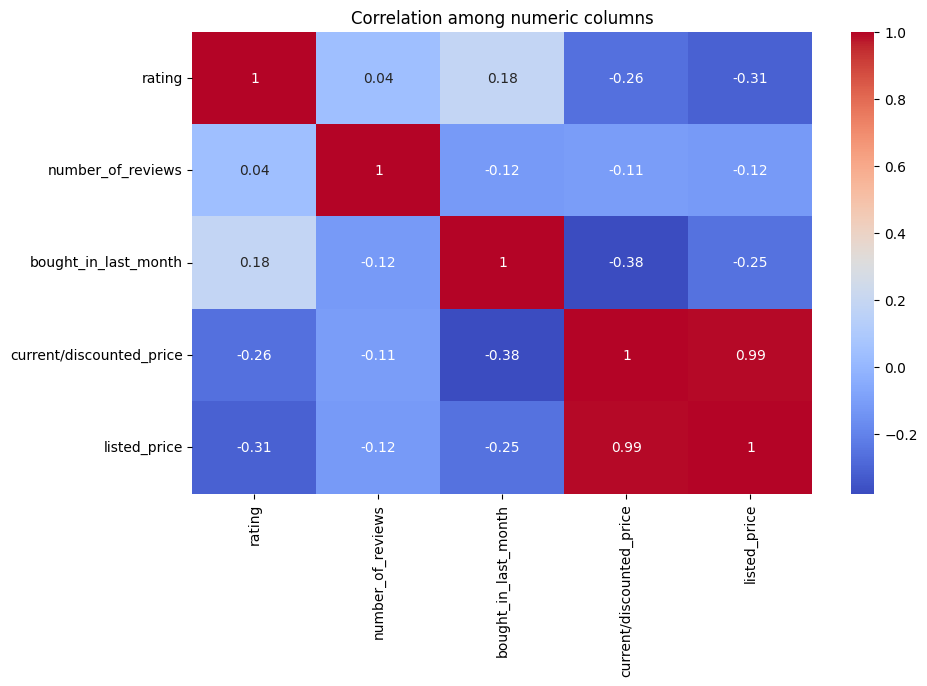

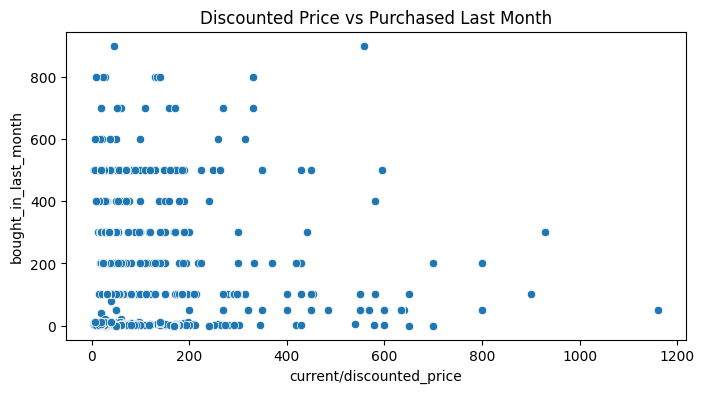

In [23]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(filtereDF[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation among numeric columns")
plt.show()

# Scatter plot example
plt.figure(figsize=(8,4))
sns.scatterplot(x='current/discounted_price', y='bought_in_last_month', data=filtereDF)
plt.title("Discounted Price vs Purchased Last Month")
plt.show()
